In [1]:
import pandas as pd
df=pd.read_csv("orders.csv")
df

,OrderID,CustomerID,Amount,OrderDate
0,101,1.0,250.50,2024-12-20
1,102,2.0,120.00,2024-12-21
2,103,3.0,320.00,2024-12-22
3,104,4.0,NaN,2024-12-23
4,105,NaN,150.75,2024-12-24


In [3]:
df.set_index('OrderID',inplace=True)
df

,CustomerID,Amount,OrderDate
OrderID,,,
101,1.0,250.50,2024-12-20
102,2.0,120.00,2024-12-21
103,3.0,320.00,2024-12-22
104,4.0,NaN,2024-12-23
105,NaN,150.75,2024-12-24


In [5]:
df.isnull()

,CustomerID,Amount,OrderDate
OrderID,,,
101,False,False,False
102,False,False,False
103,False,False,False
104,False,True,False
105,True,False,False


In [9]:
avg=df["Amount"].mean()
df1=df.fillna({
    'Amount':avg,
    'CustomerID':df['CustomerID'].ffill()
    })
df1

,CustomerID,Amount,OrderDate
OrderID,,,
101,1.0,250.5000,2024-12-20
102,2.0,120.0000,2024-12-21
103,3.0,320.0000,2024-12-22
104,4.0,210.3125,2024-12-23
105,4.0,150.7500,2024-12-24


<Axes: xlabel='CustomerID', ylabel='Amount'>

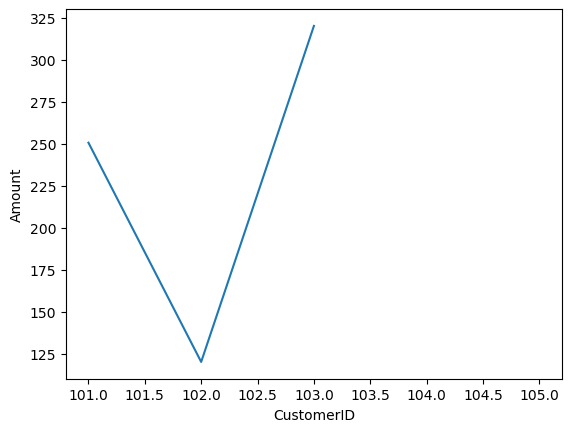

In [34]:
%matplotlib inline
(df["Amount"]).plot(x="CustomerID",xlabel="CustomerID",ylabel="Amount")

In [28]:
g=df1.groupby("CustomerID")
g


In [30]:
g.get_group(4)

,CustomerID,Amount,OrderDate
OrderID,,,
104,4.0,210.3125,2024-12-23
105,4.0,150.7500,2024-12-24


In [32]:
g["Amount"].max()

CustomerID
1.0    250.5000
2.0    120.0000
3.0    320.0000
4.0    210.3125
Name: Amount, dtype: float64